In [1]:
# Scientific computing
import numpy as np

#import optimization class
from cryoevap.optimize import Opti

# Visualisation
import matplotlib.pyplot as plt

## Module imports
# Import the storage tank Class
from cryoevap.storage_tanks import Tank

# Import Cryogen class
from cryoevap.cryogens import Cryogen

In [2]:
# Cylindrical storage tank properties
Q_roof = 0 # Roof heat ingress / W
T_air = 298.15 # Temperature of the environment K

# Set overall heat transfer coefficient through the walls for liquid and vapour
U_L = 4e-3 # W/m2/K
U_V = 4e-3 # W/m2/K

# Specify wall heat partitioning fraction
eta_w= 0.9

# Specify tank operating pressure
P = 100000 # Pa

### Variables of interest

# Vertically orientated cylindrical tank volume
V_tank = 40000 #m^3 | 

# Initial liquid filling / Dimensionless
LF = 0.95 

a = 1

d_i = ((4 * V_tank)/(np.pi * a))**(1/3) # internal diameter / m
# Thickness of the in % of the internal diameter
ST = 1.02
d_o = d_i * ST # external diameter / m

# Initialize large-scale tank
mid_tank = Tank(d_i, d_o, V_tank, LF)
mid_tank.set_HeatTransProps(U_L, U_V, T_air, Q_b_fixed = None, Q_roof = 0, eta_w = 0.90)

# Initialise cryogen
cryogen = Cryogen(name = "hydrogen")
cryogen.set_coolprops(P)

# Set cryogen
mid_tank.cryogen = cryogen

# Calculate initial evaporation rate
print("The initial evaporation rate of " + cryogen.name + " is %.1f kg/h" % (mid_tank.b_l_dot * 3600))

The initial evaporation rate of hydrogen is 48.7 kg/h


In [3]:
# Calculate initial evaporation rate
print("The initial evaporation rate of " + cryogen.name + " is %.1f kg/h" % (mid_tank.b_l_dot * 3600))

# Estimate transient period duration
print("Transient period = %.3f s " % mid_tank.tau)

# Minimum number of hours to achieve steady state 
tau_h = (np.floor(mid_tank.tau / 3600) + 1)

# Print simulation time of the transient period for short-term storage
print("Simulation time: %.0i h" % tau_h )

# Calculate boil-off rate
BOR = (mid_tank.b_l_dot * 24 * 3600) / (mid_tank.V * mid_tank.LF * mid_tank.cryogen.rho_L)
print("BOR = %.3f %%" % (BOR * 100))

The initial evaporation rate of hydrogen is 48.7 kg/h
Transient period = 389589.689 s 
Simulation time: 109 h
BOR = 0.043 %


In [4]:
optimization = Opti(mid_tank, time=48)

0.40857274020683076
0.0005241460629324401


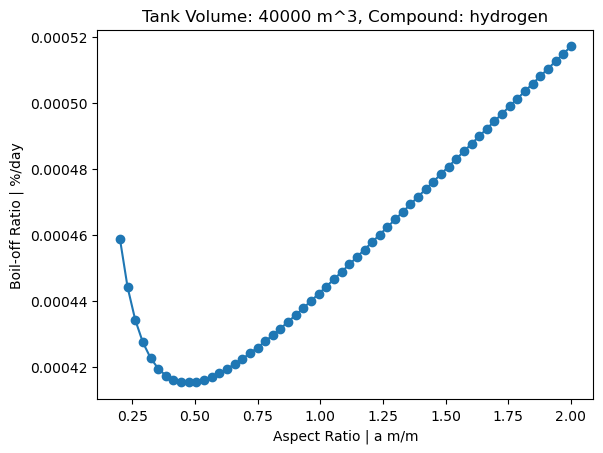

In [5]:
optimization.rs_plot()